# darfur data
pull and clean from different data sources

sources
- ACLED Africa dataset
- [humdata](https://data.humdata.org/dataset/darfur-damaged-and-destroyed-villages?), specific to darfur
    - destroyed villages 2003-2010
- UCDP

planning on porting in
- GDELT
- ViEWS

In [2]:
import pandas as pd
from shapely.geometry import Point
import numpy as np
import csv
from shapely import wkt
import geopandas as gpd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:

## loading datasets
do_print = False

## import sudanese shapefiles
shapefile_path = "../data/shapefiles/Sudan 2015 Divisions" # level 1 admin districts
sudan_shp = gpd.read_file(shapefile_path)
if do_print: print(sudan_shp.head())

## darfur acled data
darfur_acled = pd.read_csv("../data/acled/darfur.csv")
darfur_acled['geometry'] = gpd.points_from_xy(darfur_acled["LONGITUDE"], darfur_acled["LATITUDE"])
darfur_acled = gpd.GeoDataFrame(darfur_acled, geometry='geometry')
if do_print: print(darfur_acled.head())

## darfur village destruction dataset from humdata
darfur_shp = "../data/shapefiles/Darfur Damaged Villages 2010"
village_damage = gpd.read_file(darfur_shp)
if do_print: print(village_damage.head())

## ucdp darfur data
darfur_ucdp = pd.read_csv("../data/ucdp/darfur_113023.csv")
darfur_ucdp['COORDS'] = darfur_ucdp["COORDS"].apply(wkt.loads)
darfur_ucdp = gpd.GeoDataFrame(darfur_ucdp, geometry='COORDS')

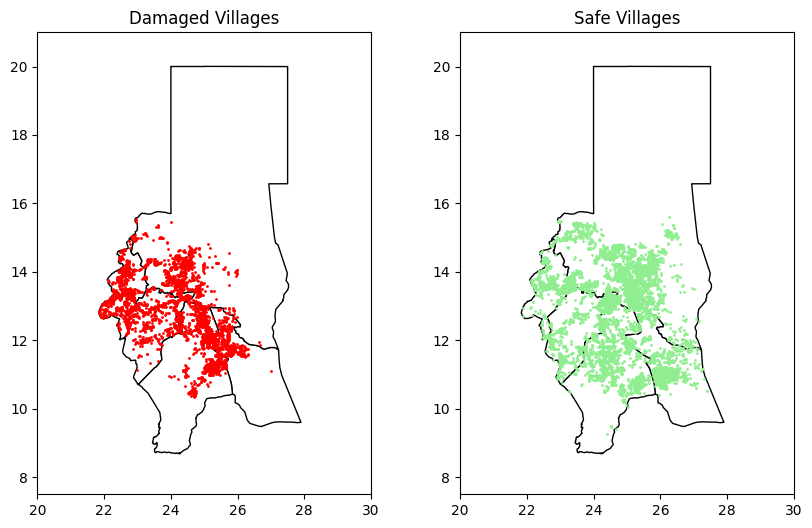

In [8]:


def plot_darfur(ax):
    darfur_regions = sudan_shp[sudan_shp["NAME_1"].str.contains("Darfur")]
    darfur_regions.plot(ax=ax, edgecolor='black', color="white")
    ax.set_xlim([20, 30])
    ax.set_ylim([7.5, 21])

## Plot comparison of damaged and un-damaged villages
# damaged villages
damaged_villages = village_damage[(village_damage["STATUS"] == "DESTROYED") | (village_damage["STATUS"] == "DAMAGED")]
# damaged_villages.plot(ax=ax, color='red', markersize=1)
safe_villages = village_damage[village_damage["STATUS"] == "NO DAMAGE"]
# safe_villages.plot(ax=ax, color='lightgreen', markersize=1)
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

plot_darfur(axs[0])
damaged_villages.plot(ax=axs[0], color='red', markersize=1)
axs[0].set_title("Damaged Villages")

plot_darfur(axs[1])
safe_villages.plot(ax=axs[1], color='lightgreen', markersize=1)
axs[1].set_title("Safe Villages")

plt.show()

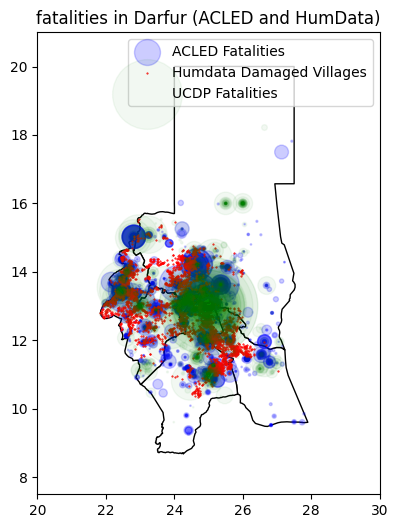

In [80]:
## plot ACLED data
fig, ax = plt.subplots(figsize=(10, 6))
plot_darfur(ax)

darfur_acled.plot(ax=ax, color='blue', markersize=darfur_acled["FATALITIES"], alpha=0.2)
damaged_villages.plot(ax=ax, color='red', markersize=0.25)
# safe_villages.plot(ax=ax, color='lightgreen', markersize=0.25)
darfur_ucdp.plot(ax=ax, color='green', markersize=darfur_ucdp["best_est"], alpha=0.05)

plt.legend(["ACLED Fatalities", "Humdata Damaged Villages", "UCDP Fatalities"])
plt.title("fatalities in Darfur (ACLED and HumData)")
plt.show()



<Axes: >

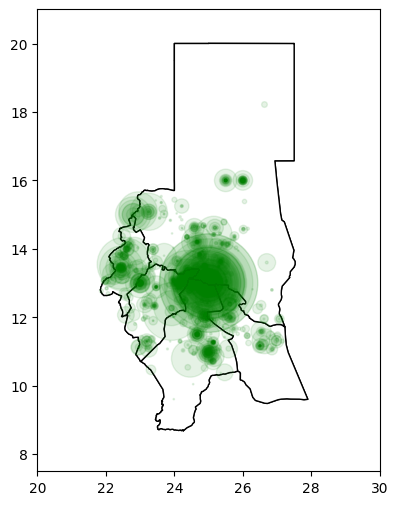

In [10]:
## plot UCDP data
fig, ax = plt.subplots(figsize=(10, 6))
plot_darfur(ax)

sudan_shp[sudan_shp["NAME_1"].str.contains("Darfur")].plot(ax=ax, edgecolor='black', color="white")

darfur_ucdp.plot(ax=ax, color='green', markersize=darfur_ucdp["best_est"], alpha=0.1)

<Axes: >

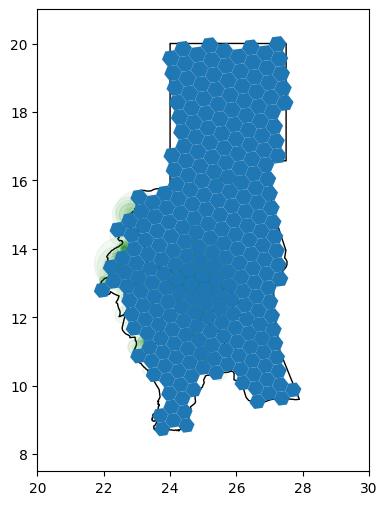

In [25]:
import ellipsis
import geopandas
import h3pandas

fig, ax = plt.subplots(figsize=(10, 6))
darfur_regions = sudan_shp[sudan_shp["NAME_1"].str.contains("Darfur")]
darfur_regions.plot(ax=ax, edgecolor='black', color="white")
ax.set_xlim([20, 30])
ax.set_ylim([7.5, 21])

# relevant = darfur_ucdp[ darfur_ucdp.intersects(darfur_regions['geometry'].values[0])]
# relevant.plot()
darfur_ucdp.plot(ax=ax, color='green', markersize=darfur_ucdp["best_est"], alpha=0.05)

resolution = 4
hexagons = darfur_regions.h3.polyfill_resample(resolution)
hexagons.plot(ax=ax)




In [26]:
darfur_ucdp.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best_est',
       'high_est', 'low_est', 'COORDS'],
      dtype='object')

In [27]:
hexagons.head()

,index,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
h3_polyfill,,,,,,,,,,,,,,
846b1d5ffffffff,3,218,SDN,Sudan,4,Central Darfur,SD.CD,0,None,Wilayat,State,None,Zalingei,"POLYGON ((23.09320 12.12172, 23.00144 11.90000..."
846b03bffffffff,3,218,SDN,Sudan,4,Central Darfur,SD.CD,0,None,Wilayat,State,None,Zalingei,"POLYGON ((23.23758 13.61368, 23.14433 13.38881..."
846b18bffffffff,3,218,SDN,Sudan,4,Central Darfur,SD.CD,0,None,Wilayat,State,None,Zalingei,"POLYGON ((23.15962 11.71487, 23.06806 11.49409..."
846b0ebffffffff,3,218,SDN,Sudan,4,Central Darfur,SD.CD,0,None,Wilayat,State,None,Zalingei,"POLYGON ((24.41280 13.56880, 24.31732 13.34451..."
846b0e5ffffffff,3,218,SDN,Sudan,4,Central Darfur,SD.CD,0,None,Wilayat,State,None,Zalingei,"POLYGON ((23.71649 13.04923, 23.62277 12.82572..."


In [39]:
hexagons['count'] = 0

total_deaths = 0
for i in range(darfur_ucdp.shape[0]):
    locations = darfur_ucdp['COORDS'].values[i]
    deaths = darfur_ucdp['best_est'].values[i]
    total_deaths += deaths
    update_bools = hexagons.intersects(locations)
    
    try:
        hexagons.loc[update_bools, 'count'] = hexagons.loc[update_bools, 'count'] + deaths
    except AssertionError as error:
        print("AssertionError occurred: ", error)

print("total deaths: ", total_deaths)
print(hexagons.head())

total deaths:  100066
                 index  ID_0  ISO NAME_0  ID_1          NAME_1 HASC_1  CCN_1  \
h3_polyfill                                                                    
846b1d5ffffffff      3   218  SDN  Sudan     4  Central Darfur  SD.CD      0   
846b03bffffffff      3   218  SDN  Sudan     4  Central Darfur  SD.CD      0   
846b18bffffffff      3   218  SDN  Sudan     4  Central Darfur  SD.CD      0   
846b0ebffffffff      3   218  SDN  Sudan     4  Central Darfur  SD.CD      0   
846b0e5ffffffff      3   218  SDN  Sudan     4  Central Darfur  SD.CD      0   

                CCA_1   TYPE_1 ENGTYPE_1 NL_NAME_1 VARNAME_1  \
h3_polyfill                                                    
846b1d5ffffffff  None  Wilayat     State      None  Zalingei   
846b03bffffffff  None  Wilayat     State      None  Zalingei   
846b18bffffffff  None  Wilayat     State      None  Zalingei   
846b0ebffffffff  None  Wilayat     State      None  Zalingei   
846b0e5ffffffff  None  Wilayat   

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
# hexagons.plot(column='count', ax=ax, cmap='YlOrRd', legend=True)
import matplotlib.colors as colors
cmap = colors.LogNorm(vmin=hexagons['count'].min(), vmax=hexagons['count'].max())
hexagons.plot(column='count', ax=ax, cmap='YlOrRd', legend=True, norm=cmap)

plt.show()

ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 1000x600 with 1 Axes>

## cleaning data for darfur

In [19]:
import ellipsis as el
token = el.account.logIn('demo_user', 'demo_user')
pathId = el.path.vector.add('hexs', token = token)['id']
timestampId = el.path.vector.timestamp.add(pathId, token)['id']

el.path.vector.timestamp.feature.add(pathId, timestampId, hexagons, token)

no properties known for this timestamp adding them automatically
267/267 [====================================================================================================]

['6713a5a0-c19f-4198-ab77-a7636ea2f9fd',
 '2266608d-824c-4189-b6a4-3a676a5ef3e6',
 'ba399283-ed29-475c-a3f4-c80717ec5685',
 '20cd5fb1-f1fe-424d-b420-942922251989',
 'b8b4a922-4e35-4896-b876-c1ad702abe7a',
 'bfc9cf00-b556-4fae-90d1-d11acb87aeca',
 '7baf90d2-cded-4bee-be38-2d73130bcbd5',
 '304d3f89-cec2-4ef6-9493-06ecb7e89f18',
 'bf247821-4be7-4592-9f3e-2fa933a253f6',
 'b9388a53-c323-40b5-a22f-5fb0a0cc7eea',
 'f175bbf8-c524-4d07-b120-18d6549e2343',
 '908be5af-3d26-4ed5-b0ce-fb90b5f0136f',
 'e8b3f06f-55d2-4217-a04d-6565c1e90782',
 '71949e7d-a83c-4ead-83d9-7d38f74e9306',
 'c21e6967-81d2-4f5d-8b37-2d3fdcbc0668',
 '2128ea33-059a-46d1-acd0-202da0757a58',
 '6a591df7-f4db-4796-a1d1-b86d98464fca',
 '60a15b71-bed1-4090-a683-5076926b087a',
 '526facde-e1e1-4ff7-badb-865eb49ee02a',
 '41f41b56-e733-4c93-807f-d62712ceaf37',
 '3b773c51-32f4-45c1-b7f1-615d5879ac06',
 'ac803d56-ed70-4c39-b201-453b4c2a0212',
 '4f54d969-3760-4860-a780-86033453afa0',
 '23024884-03ac-495d-b02d-485d5c7c046a',
 '192baabe-b7c6-

In [ ]:
## Only run once to create the ACLED darfur.csv file

# # read original ACLED points
# df = pd.read_csv("../data/acled/africa.csv")

# # Define the borders
# sudan_regions = gpd.read_file("../data/shapefiles/Sudan 2015 Divisions")
# darfur_regions = sudan_regions[sudan_regions["NAME_1"].str.contains("Darfur")]

# # Convert the longitude and latitude to a shapely Point object
# df['COORDS'] = list(zip(df["LONGITUDE"], df["LATITUDE"]))
# df['COORDS'] = df['COORDS'].apply(Point)

# # Create a GeoDataFrame from the DataFrame
# gdf = gpd.GeoDataFrame(df, geometry='COORDS')

# # Filter the GeoDataFrame to only include points within the borders
# gdf_in_darfur = gdf[gdf['COORDS'].apply(lambda x: darfur_regions.geometry.contains(x).any())]
# gdf_in_darfur.to_csv("../data/acled/darfur.csv", index=False)

In [33]:
# run once to generate the darfur_113023.csv file from ucdp data
df = pd.read_csv("../data/ucdp/Sudan_113023.csv")

# Define the borders
sudan_regions = gpd.read_file("../data/shapefiles/Sudan 2015 Divisions")
darfur_regions = sudan_regions[sudan_regions["NAME_1"].str.contains("Darfur")]

# Convert the longitude and latitude to a shapely Point object
from shapely import wkt
df['COORDS'] = df["longitude"]
df['COORDS'] = df['COORDS'].apply(wkt.loads)


# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry='COORDS')

# Filter the GeoDataFrame to only include points within the borders
gdf_in_darfur = gdf[gdf['COORDS'].apply(lambda x: darfur_regions.geometry.contains(x).any())]
gdf_in_darfur.to_csv("../data/ucdp/darfur_113023.csv", index=False)

read_df = pd.read_csv("../data/ucdp/darfur_113023.csv")

read_df